<a href="https://colab.research.google.com/github/mgfrantz/CodingNomads-Intro-To-Deep-Learning-Labs/blob/master/Basic_Tensor_Operations_workset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a tensor?

Pretty much everything is a tensor. Scalar values like 1, pi, -1.58e8, or any number you can put on a number line is a rank 0 tensor. Vectors are rank 1 tensors. Matrices are rank 2 tensors, and so on.

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
def describe_tensor(t):
    """
    Describes a few basic elements about any torch.Tensor.
    Prints out shape, number of elements, and rank.
    """
    print(f"Shape (Tensor.shape): {t.shape}")
    print(f"Number of elements (Tensor.numel()): {t.numel()}")
    print(f"Number of dimensions, or rank + 1 (Tensor.ndim): {t.ndim}")
    print(f"Tensor type (Tensor.dtype): {t.dtype}")

In [ ]:
rank0tensor = torch.tensor(1)
rank0tensor

tensor(1)

In [ ]:
describe_tensor(rank0tensor)

Shape (Tensor.shape): torch.Size([])
Number of elements (Tensor.numel()): 1
Number of dimensions, or rank + 1 (Tensor.ndim): 0
Tensor type (Tensor.dtype): torch.int64


tensor.ndim=0. It`s just a number dimension=0

In [ ]:
rank1tensor = torch.tensor([1.,2,3])
rank1tensor

tensor([1., 2., 3.])

In [ ]:
describe_tensor(rank1tensor)

Shape (Tensor.shape): torch.Size([3])
Number of elements (Tensor.numel()): 3
Number of dimensions, or rank + 1 (Tensor.ndim): 1
Tensor type (Tensor.dtype): torch.float32


In [ ]:
rank2tensor = torch.tensor(
    [
     [1.,2,3],
     [4,5,6],
     [7,8,9]
    ]
)
rank2tensor

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
describe_tensor(rank2tensor)

Shape (Tensor.shape): torch.Size([3, 3])
Number of elements (Tensor.numel()): 9
Number of dimensions, or rank + 1 (Tensor.ndim): 2
Tensor type (Tensor.dtype): torch.float32


In [ ]:
rank3tensor = torch.rand(3, 3, 3)
rank3tensor

tensor([[[0.6502, 0.5590, 0.4382],
         [0.8881, 0.7488, 0.7707],
         [0.5850, 0.4385, 0.0801]],

        [[0.6449, 0.0635, 0.5618],
         [0.3032, 0.5965, 0.3708],
         [0.4521, 0.6521, 0.5256]],

        [[0.5356, 0.8215, 0.0502],
         [0.5130, 0.8524, 0.7246],
         [0.7495, 0.0711, 0.7164]]])

In [ ]:
describe_tensor(rank3tensor)

Shape (Tensor.shape): torch.Size([3, 3, 3])
Number of elements (Tensor.numel()): 27
Number of dimensions, or rank + 1 (Tensor.ndim): 3
Tensor type (Tensor.dtype): torch.float32


In [ ]:
# We won't try to visualize this tensor since it doesn't fit neatly into my brain.
# This is just to show we can make big tensors, even if we don't have a practical use for them.
n_dim = 10
describe_tensor(torch.randn(*(tuple([3] * n_dim))))

Shape (Tensor.shape): torch.Size([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Number of elements (Tensor.numel()): 59049
Number of dimensions, or rank + 1 (Tensor.ndim): 10
Tensor type (Tensor.dtype): torch.float32


## Exercise 3.1: Torch `dtype`s

Read through the [documentation](https://pytorch.org/docs/stable/tensor_attributes.html#torch-dtype) on different tensor types.

Create a function that uses the [`Tensor.element_size()`](https://pytorch.org/docs/stable/generated/torch.Tensor.element_size.html#) and `Tensor.numel()` methods to calculate the memory footprint of a tensor in megabytes.
There are 1e6 bytes in a megabyte.
Then, create at least 3 tensors with the same shape but different `dtype`s.
What's the difference in the memory footprints of the following tensors?


In [ ]:
def memory_footprint(tensor):
    return tensor.element_size()*tensor.numel()/1e6

In [ ]:
tensors=[
    torch.tensor(100, dtype=torch.float16),
    torch.tensor(100, dtype=torch.float32),
    torch.tensor(100, dtype=torch.int32),
    torch.tensor(100, dtype=torch.long)     #I think this is int64
]

In [ ]:
for t in tensors:
  print(f"""
  Tensor:
  {t}
  dtype:{t.dtype}
  memory footprint (MB): {memory_footprint(t)}

      """)


  Tensor:
  100.0
  dtype:torch.float16
  memory footprint (MB): 2e-06

      

  Tensor:
  100.0
  dtype:torch.float32
  memory footprint (MB): 4e-06

      

  Tensor:
  100
  dtype:torch.int32
  memory footprint (MB): 4e-06

      

  Tensor:
  100
  dtype:torch.int64
  memory footprint (MB): 8e-06

      


<!-- split -->
# Scalar operations

In [ ]:
x = torch.ones(4).float()
x

tensor([1., 1., 1., 1.])

In [ ]:
x * 4

tensor([4., 4., 4., 4.])

In [ ]:
x + 4

tensor([5., 5., 5., 5.])

In [ ]:
x - 2

tensor([-1., -1., -1., -1.])

In [ ]:
x / 4

tensor([0.2500, 0.2500, 0.2500, 0.2500])

<!-- split -->
# Element-wise operations

In [ ]:
x = torch.rand(4)
y = torch.rand(4)
x, y

(tensor([0.7261, 0.5164, 0.6360, 0.4013]),
 tensor([0.3891, 0.8776, 0.6485, 0.4758]))

In [ ]:
x + y

tensor([1.1152, 1.3940, 1.2844, 0.8771])

In [ ]:
x - y

tensor([ 0.3370, -0.3612, -0.0125, -0.0745])

In [ ]:
x * y

tensor([0.2825, 0.4532, 0.4124, 0.1909])

In [ ]:
x / y

tensor([1.8661, 0.5884, 0.9808, 0.8433])

<!-- split -->
## Broadcasting

https://numpy.org/doc/stable/user/basics.broadcasting.html

In [ ]:
x = torch.rand(2, 4)
y = torch.rand(4)
x, y

(tensor([[0.3132, 0.6632, 0.5244, 0.9619],
         [0.0075, 0.2437, 0.0984, 0.1975]]),
 tensor([0.4005, 0.4273, 0.4652, 0.4631]))

In [ ]:
torch.stack([x[0] * y, x[1] * y])

tensor([[0.1254, 0.2834, 0.2439, 0.4455],
        [0.0030, 0.1042, 0.0458, 0.0915]])

We can see that it`s the same as broadcasting it.
because -->x(2,4) broad y(1,4)

In [ ]:
x * y

tensor([[0.1254, 0.2834, 0.2439, 0.4455],
        [0.0030, 0.1042, 0.0458, 0.0915]])

In [ ]:
x = torch.rand(3, 2, 4)
x, y

(tensor([[[0.9486, 0.2938, 0.6418, 0.2854],
          [0.6222, 0.9157, 0.2977, 0.5234]],
 
         [[0.6110, 0.0395, 0.5154, 0.8638],
          [0.8242, 0.6927, 0.2419, 0.3316]],
 
         [[0.2184, 0.1547, 0.8222, 0.6818],
          [0.3935, 0.7276, 0.2160, 0.3630]]]),
 tensor([0.4005, 0.4273, 0.4652, 0.4631]))

In [ ]:
x * y

tensor([[[0.3799, 0.1256, 0.2985, 0.1322],
         [0.2492, 0.3913, 0.1385, 0.2424]],

        [[0.2447, 0.0169, 0.2398, 0.4001],
         [0.3301, 0.2960, 0.1125, 0.1536]],

        [[0.0874, 0.0661, 0.3825, 0.3158],
         [0.1576, 0.3109, 0.1005, 0.1681]]])

Again same situation. It`s broadcastable
x(3,2,4)
y(1,1,4)

<!-- split -->
## Tensor multiplication: the dot product of two vectors


In [ ]:
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([2, 3, 4, 5])

In [ ]:
# Let's do this using element-wise operations
(x * y).sum()

tensor(40)

In [ ]:
# torch.matmul does matrix multiplication.
torch.matmul(x, y)

tensor(40)

In [ ]:
# @ is shorthand for matrix multiplication as well.
x@y

tensor(40)

In [ ]:
y@x

tensor(40)

<!-- split -->
## Tensor multiplication: matrix multiplication

In [ ]:
X = torch.tensor([[1, 2], [3, 4]])
Y = torch.tensor([[2, 3, 4], [5, 6, 7]])

In [ ]:
X@Y

tensor([[12, 15, 18],
        [26, 33, 40]])

In [ ]:
(torch.randn(16, 3, 3, 3) @ torch.randn(3, 3, 12)).shape

torch.Size([16, 3, 3, 12])

In [ ]:
torch.matmul(X, Y)      #we can also multiply the matrices by matmul

tensor([[12, 15, 18],
        [26, 33, 40]])

## Exercise 3.2: matrix multiplication

Previously, we tried to multiply `X@Y`.
Will `Y@X` work?
Why or why not?

In the cell below, define `B`  using `torch.rand` so that `A@B` returns a tensor with shape (4, 7).

In [ ]:
A = torch.rand(4, 2)
B = torch.rand(2,7)

In [ ]:
if not isinstance(B, type(...)):
    assert (A@B).shape == (4, 7)
else:
    print('Please define B such that (A@B).shape = (4, 7)')

In [ ]:
A@B

tensor([[0.7814, 0.3524, 0.5215, 0.5146, 0.5379, 0.9015, 0.2636],
        [1.2158, 0.5838, 0.7850, 0.8529, 0.8076, 1.4445, 0.4560],
        [0.9930, 0.5045, 0.6206, 0.7374, 0.6368, 1.2126, 0.4082],
        [0.7015, 0.2529, 0.5150, 0.3688, 0.5350, 0.7343, 0.1548]])

<!-- split -->
## Useful tensor functions and methods

In [ ]:
X = torch.tensor(list(range(27))).reshape(3,3,3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [ ]:
X.sum()

tensor(351)

In [ ]:
# Change the dim parameter to see how the results change
X.sum(dim=0)

tensor([[27, 30, 33],
        [36, 39, 42],
        [45, 48, 51]])

Ha sumado cada elemento. (1,1) de la matriz 1 +matriz 2 (1,1)+ matriz 3 (1,1)
asi cada elemento

<!-- split -->
## Reshaping tensors

Reshaping tensors
We will need to reshape tensors quite often in our work. Why would we need to do this? Sometimes, our data is not in an order we expect. For example, most image formats are of shape (height, width, channels), but nn.Conv2d expects (channels, height, width). Alternately, sometimes we need re-shape activations so they work in subsequent tensor multiplications. We may need to change row vectors to column vectors, or column to row. We may just want to view the tensor in a particular way.

Whatever we're doing, reshaping can be pretty straightforward. In the next block of code, we'll demonstrate a few key tensor methods.

In [ ]:
# Create a vector
X = torch.arange(0, 3*3*3)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])

Let's reshape `X` to be "image-like."
This means X should be a `Tensor` with 3 dimensions - a height, a width, and a number of channels (normally 3).

In [ ]:
# Reshape it into a 3x3x3 to be "image-like"
X = X.reshape(3, 3, 3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

Many times, you will have to add or remove dimensions from tensors. For example, when we put tensors into a batch together, we need a new axis to concatenate them. Tensor.unsqueeze (adding dimensions) and Tensor.squeeze (removing dimesnions) can be really useful. The next few cells creates a pseudo-batch.

Now let's look at the squeeze method. You will often run into scenarios where you have an empty dimension, and need to get rid of it before passing it to a loss function or metric to calculate a score. In the cell below, we create a random tensor with many extra dimensions and apply the sqeeeze method. If you want to remove a specific dimension, you can pass that dimension to the squeeze method.

In [ ]:
# How do we add a "batch_dim"?
# Unsqueeze addes an empty dimension
# Squeeze takes away empty dimensions
X.shape, X.unsqueeze(0).shape

(torch.Size([3, 3, 3]), torch.Size([1, 3, 3, 3]))

In [ ]:
# Use unsqueeze to create a "batch"
torch.cat([X.unsqueeze(0), X.unsqueeze(0)]).shape

torch.Size([2, 3, 3, 3])

In [ ]:
y = torch.randn(1, 1, 1, 1, 1, 1, 8)
y, y.shape, y.squeeze(), y.squeeze().shape, y.squeeze(2).shape

(tensor([[[[[[[-0.3253,  0.1859, -1.0794,  1.2145, -0.0549, -2.2135, -0.0932,
               -0.6969]]]]]]]),
 torch.Size([1, 1, 1, 1, 1, 1, 8]),
 tensor([-0.3253,  0.1859, -1.0794,  1.2145, -0.0549, -2.2135, -0.0932, -0.6969]),
 torch.Size([8]),
 torch.Size([1, 1, 1, 1, 1, 8]))

Si vemos y.squeeze() ha reducido todas las dimensiones hasta 1 de (1,1,1,1,1,1,8) ha pasado a (8).

y.squeeze(2) ha bajado la dimension 2 ahora es (1,1,1,1,1,8)

In [ ]:
y.squeeze(1).shape    #lo mismo que el (2)

torch.Size([1, 1, 1, 1, 1, 8])

In [ ]:
# squeeze and unsqueeze are opposites
assert X.shape == X.unsqueeze(0).squeeze(0).shape

In [ ]:
# Swap the 1nd and 2rd dim
X.permute(0, 2, 1)

tensor([[[ 0,  3,  6],
         [ 1,  4,  7],
         [ 2,  5,  8]],

        [[ 9, 12, 15],
         [10, 13, 16],
         [11, 14, 17]],

        [[18, 21, 24],
         [19, 22, 25],
         [20, 23, 26]]])

https://www.geeksforgeeks.org/python-pytorch-permute-method/

Aqui viene bien explicado

In [ ]:
X.permute(0, 1, 2)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [ ]:
X.permute(1,2,0)

tensor([[[ 0,  9, 18],
         [ 1, 10, 19],
         [ 2, 11, 20]],

        [[ 3, 12, 21],
         [ 4, 13, 22],
         [ 5, 14, 23]],

        [[ 6, 15, 24],
         [ 7, 16, 25],
         [ 8, 17, 26]]])

<!-- split -->
## Making your own functions: Sigmoid and softmax

## Exercise 3.3: Write your own `sigmoid` function`

The `softmax` function is given.
Use a similar approach to complete the `sigmoid` function.
$e^x$ in `torch` is expressed using `torch.exp(x)`.

In [ ]:
def sigmoid(x):
    return torch.exp(x)/(1+torch.exp(x))

def softmax(x, dim):
    return torch.exp(x)/torch.exp(x).sum(dim=dim)

We can see below that over the same range of values, sigmoid and softmax

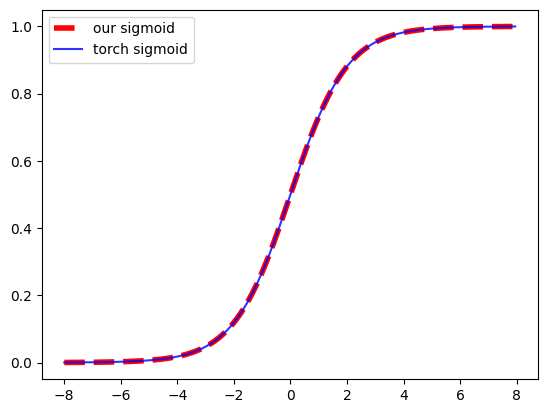

In [ ]:
x = torch.arange(-8, 8, 0.05)
plt.plot(x, sigmoid(x), label='our sigmoid', ls='--', color='r', linewidth=4)
plt.plot(x, torch.sigmoid(x), label='torch sigmoid', c='b', alpha=0.8)
plt.legend()

In [ ]:
X = torch.rand(3, 3)
print(
    'X:', X,
    'Our softmax(x):', softmax(X, dim=0),
    'Torch softmax(x):', torch.softmax(X, dim=0),
    'Sanity check: row sums:', softmax(X, dim=0).sum(dim=0),
    sep='\n'
)

X:
tensor([[0.9500, 0.3186, 0.5144],
        [0.2917, 0.9236, 0.3755],
        [0.3632, 0.2243, 0.3355]])
Our softmax(x):
tensor([[0.4822, 0.2673, 0.3695],
        [0.2496, 0.4895, 0.3216],
        [0.2682, 0.2432, 0.3090]])
Torch softmax(x):
tensor([[0.4822, 0.2673, 0.3695],
        [0.2496, 0.4895, 0.3216],
        [0.2682, 0.2432, 0.3090]])
Sanity check: row sums:
tensor([1., 1., 1.])


In [ ]:
# We can also call softmax on a tensor
X.softmax(dim=0)

tensor([[0.4822, 0.2673, 0.3695],
        [0.2496, 0.4895, 0.3216],
        [0.2682, 0.2432, 0.3090]])